In [1]:
ln = ("
Algoritmo       Ejecucion  Tiempo
'Algoritmo A'      '1'    12060
'Algoritmo A'      '2'    14089
'Algoritmo A'      '3'    13502
'Algoritmo A'      '4'     9574
'Algoritmo A'      '5'    14056
'Algoritmo A'      '6'    11569
'Algoritmo A'      '7'    13047
'Algoritmo A'      '8'    13275
'Algoritmo A'      '9'    14257
'Algoritmo A'      '10'   15075
'Algoritmo A'      '11'   12506
'Algoritmo A'      '12'   11557
'Algoritmo A'      '13'    9548
'Algoritmo A'      '14'   11514
'Algoritmo A'      '15'   16015
'Algoritmo A'      '16'   13004
'Algoritmo A'      '17'   10510
'Algoritmo A'      '18'   13040
'Algoritmo A'      '19'   17098
'Algoritmo A'      '20'   13080
'Algoritmo B'      '1'    11080
'Algoritmo B'      '2'    12089
'Algoritmo B'      '3'    12538
'Algoritmo B'      '4'    10571
'Algoritmo B'      '5'    12010
'Algoritmo B'      '6'    12598
'Algoritmo B'      '7'    13543
'Algoritmo B'      '8'    13547
'Algoritmo B'      '9'    13217
'Algoritmo B'      '10'   15297
'Algoritmo B'      '11'   12210
'Algoritmo B'      '12'   11299
'Algoritmo B'      '13'   10067
'Algoritmo B'      '14'   11279
'Algoritmo B'      '15'   14006
'Algoritmo B'      '16'   12099
'Algoritmo B'      '17'   11581
'Algoritmo B'      '18'   14012
'Algoritmo B'      '19'   15069
'Algoritmo B'      '20'   12000
'Algoritmo C'      '1'     9081
'Algoritmo C'      '2'    11012
'Algoritmo C'      '3'    11529
'Algoritmo C'      '4'     9569
'Algoritmo C'      '5'    11092
'Algoritmo C'      '6'    11524
'Algoritmo C'      '7'    12522
'Algoritmo C'      '8'    12588
'Algoritmo C'      '9'    12241
'Algoritmo C'      '10'   13257
'Algoritmo C'      '11'   11294
'Algoritmo C'      '12'   10226
'Algoritmo C'      '13'    9591
'Algoritmo C'      '14'    9224
'Algoritmo C'      '15'   12033
'Algoritmo C'      '16'   11063
'Algoritmo C'      '17'    9537
'Algoritmo C'      '18'   13014
'Algoritmo C'      '19'   14033
'Algoritmo C'      '20'   11093
")

In [36]:
options(warn=-1)
if(!require(psych)){ install.packages("psych")}
if(!require(FSA)){ install.packages("FSA")}
if(!require(Rmisc)){ install.packages("Rmisc")}
if(!require(ggplot2)){ install.packages("ggplot2")} 
if(!require(car)){ install.packages("car")} 
if(!require(multcompView)){ install.packages("multcompView")} 
if(!require(multcompView)){ install.packages("multcomp")} 
if(!require(lsmeans)){ install.packages("lsmeans")}
if(!require(rcompanion)){ install.packages("rcompanion")}
if(!require(Rcpp)){ install.packages("Rcpp")}

## Cargar los datos y ordenarlos

In [4]:
Data = read.table(textConnection(ln), header = TRUE)
Data$Algoritmo = factor(Data$Algoritmo, levels=unique(Data$Algoritmo))

## Verificar que todo esté en orden y liberar la tabla 

In [5]:
library(psych)
headTail(Data)
str(Data)
summary(Data)
rm(ln)

,Algoritmo,Ejecucion,Tiempo
,<fct>,<chr>,<chr>
1,Algoritmo A,1,12060
2,Algoritmo A,2,14089
3,Algoritmo A,3,13502
4,Algoritmo A,4,9574
...,NA,...,...
57,Algoritmo C,17,9537
58,Algoritmo C,18,13014
59,Algoritmo C,19,14033
60,Algoritmo C,20,11093


'data.frame':	60 obs. of  3 variables:
 $ Algoritmo: Factor w/ 3 levels "Algoritmo A",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Ejecucion: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Tiempo   : int  12060 14089 13502 9574 14056 11569 13047 13275 14257 15075 ...


       Algoritmo    Ejecucion         Tiempo     
 Algoritmo A:20   Min.   : 1.00   Min.   : 9081  
 Algoritmo B:20   1st Qu.: 5.75   1st Qu.:11093  
 Algoritmo C:20   Median :10.50   Median :12094  
                  Mean   :10.50   Mean   :12234  
                  3rd Qu.:15.25   3rd Qu.:13262  
                  Max.   :20.00   Max.   :17098  

## Resumen de datos por grupo

In [6]:
Summarize(Tiempo ~ Algoritmo, data=Data, digits=3)

Algoritmo,n,mean,sd,min,Q1,median,Q3,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Algoritmo A,20,12918.80,1941.192,9548,11566.00,13043.5,14064.25,17098
Algoritmo B,20,12505.60,1414.667,10067,11510.50,12154.5,13544.00,15297
Algoritmo C,20,11276.15,1424.242,9081,10067.25,11193.5,12311.25,14033


## Gráfico de Cajas

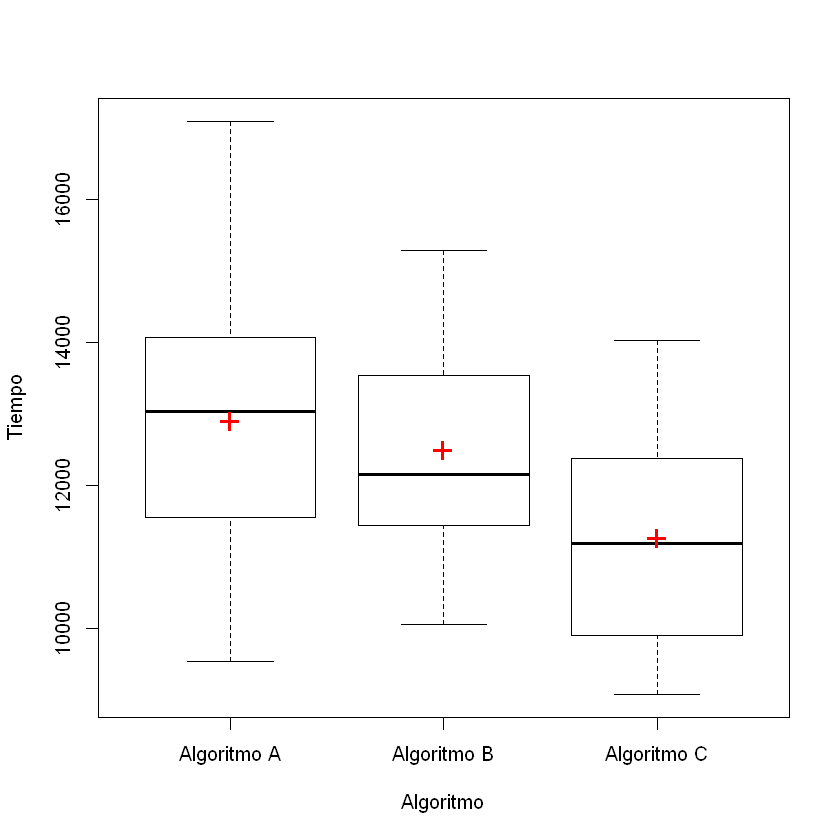

In [7]:
M = tapply(Data$Tiempo, INDEX= Data$Algoritmo, FUN = mean)
boxplot(Tiempo ~ Algoritmo, data = Data)
points(M, col="red", pch="+", cex=2)

## Gráfico de Promedios e Intervalos de confianza

In [8]:
library(Rcpp)
Sum = groupwiseMean(Tiempo ~ Algoritmo, 
                    data = Data, 
                    conf = 0.95,
                    digits = 3,
                    traditional = FALSE,
                    percentile = TRUE)
Sum

Algoritmo,n,Mean,Conf.level,Percentile.lower,Percentile.upper
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Algoritmo A,20,12900,0.95,12100,13800
Algoritmo B,20,12500,0.95,11900,13100
Algoritmo C,20,11300,0.95,10700,11900


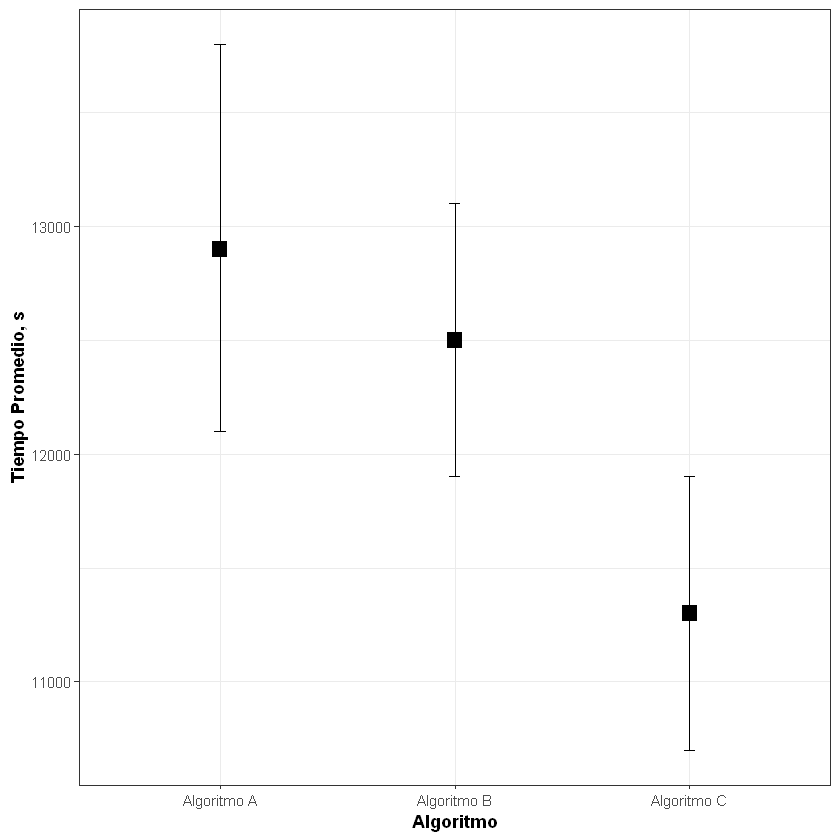

In [19]:
library(ggplot2)
ggplot(Sum, aes(x=Algoritmo, y=Mean)) +
geom_errorbar(aes(ymin=Percentile.lower, ymax=Percentile.upper), width = 0.05, size=0.5) + 
geom_point(shape=15,size=4) +
theme_bw() +
theme(axis.title = element_text(face="bold")) +
ylab("Tiempo Promedio, s")

## Definimos el Modelo Lineal

In [20]:
model = lm(Tiempo ~ Algoritmo, data = Data)
summary(model)


Call:
lm(formula = Tiempo ~ Algoritmo, data = Data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3370.8 -1211.6    25.1  1065.4  4179.2 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           12918.8      360.5  35.835  < 2e-16 ***
AlgoritmoAlgoritmo B   -413.2      509.8  -0.810  0.42105    
AlgoritmoAlgoritmo C  -1642.6      509.8  -3.222  0.00211 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1612 on 57 degrees of freedom
Multiple R-squared:  0.1647,	Adjusted R-squared:  0.1353 
F-statistic: 5.618 on 2 and 57 DF,  p-value: 0.005932


## Hacemos el Anova

In [21]:
library(car)
Anova(model, 
     type = "II") ##Tipo II es el predeterminado

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Algoritmo,29203870,2,5.617588,0.005931933
Residuals,148161499,57,NA,NA


## Histograma de residuos

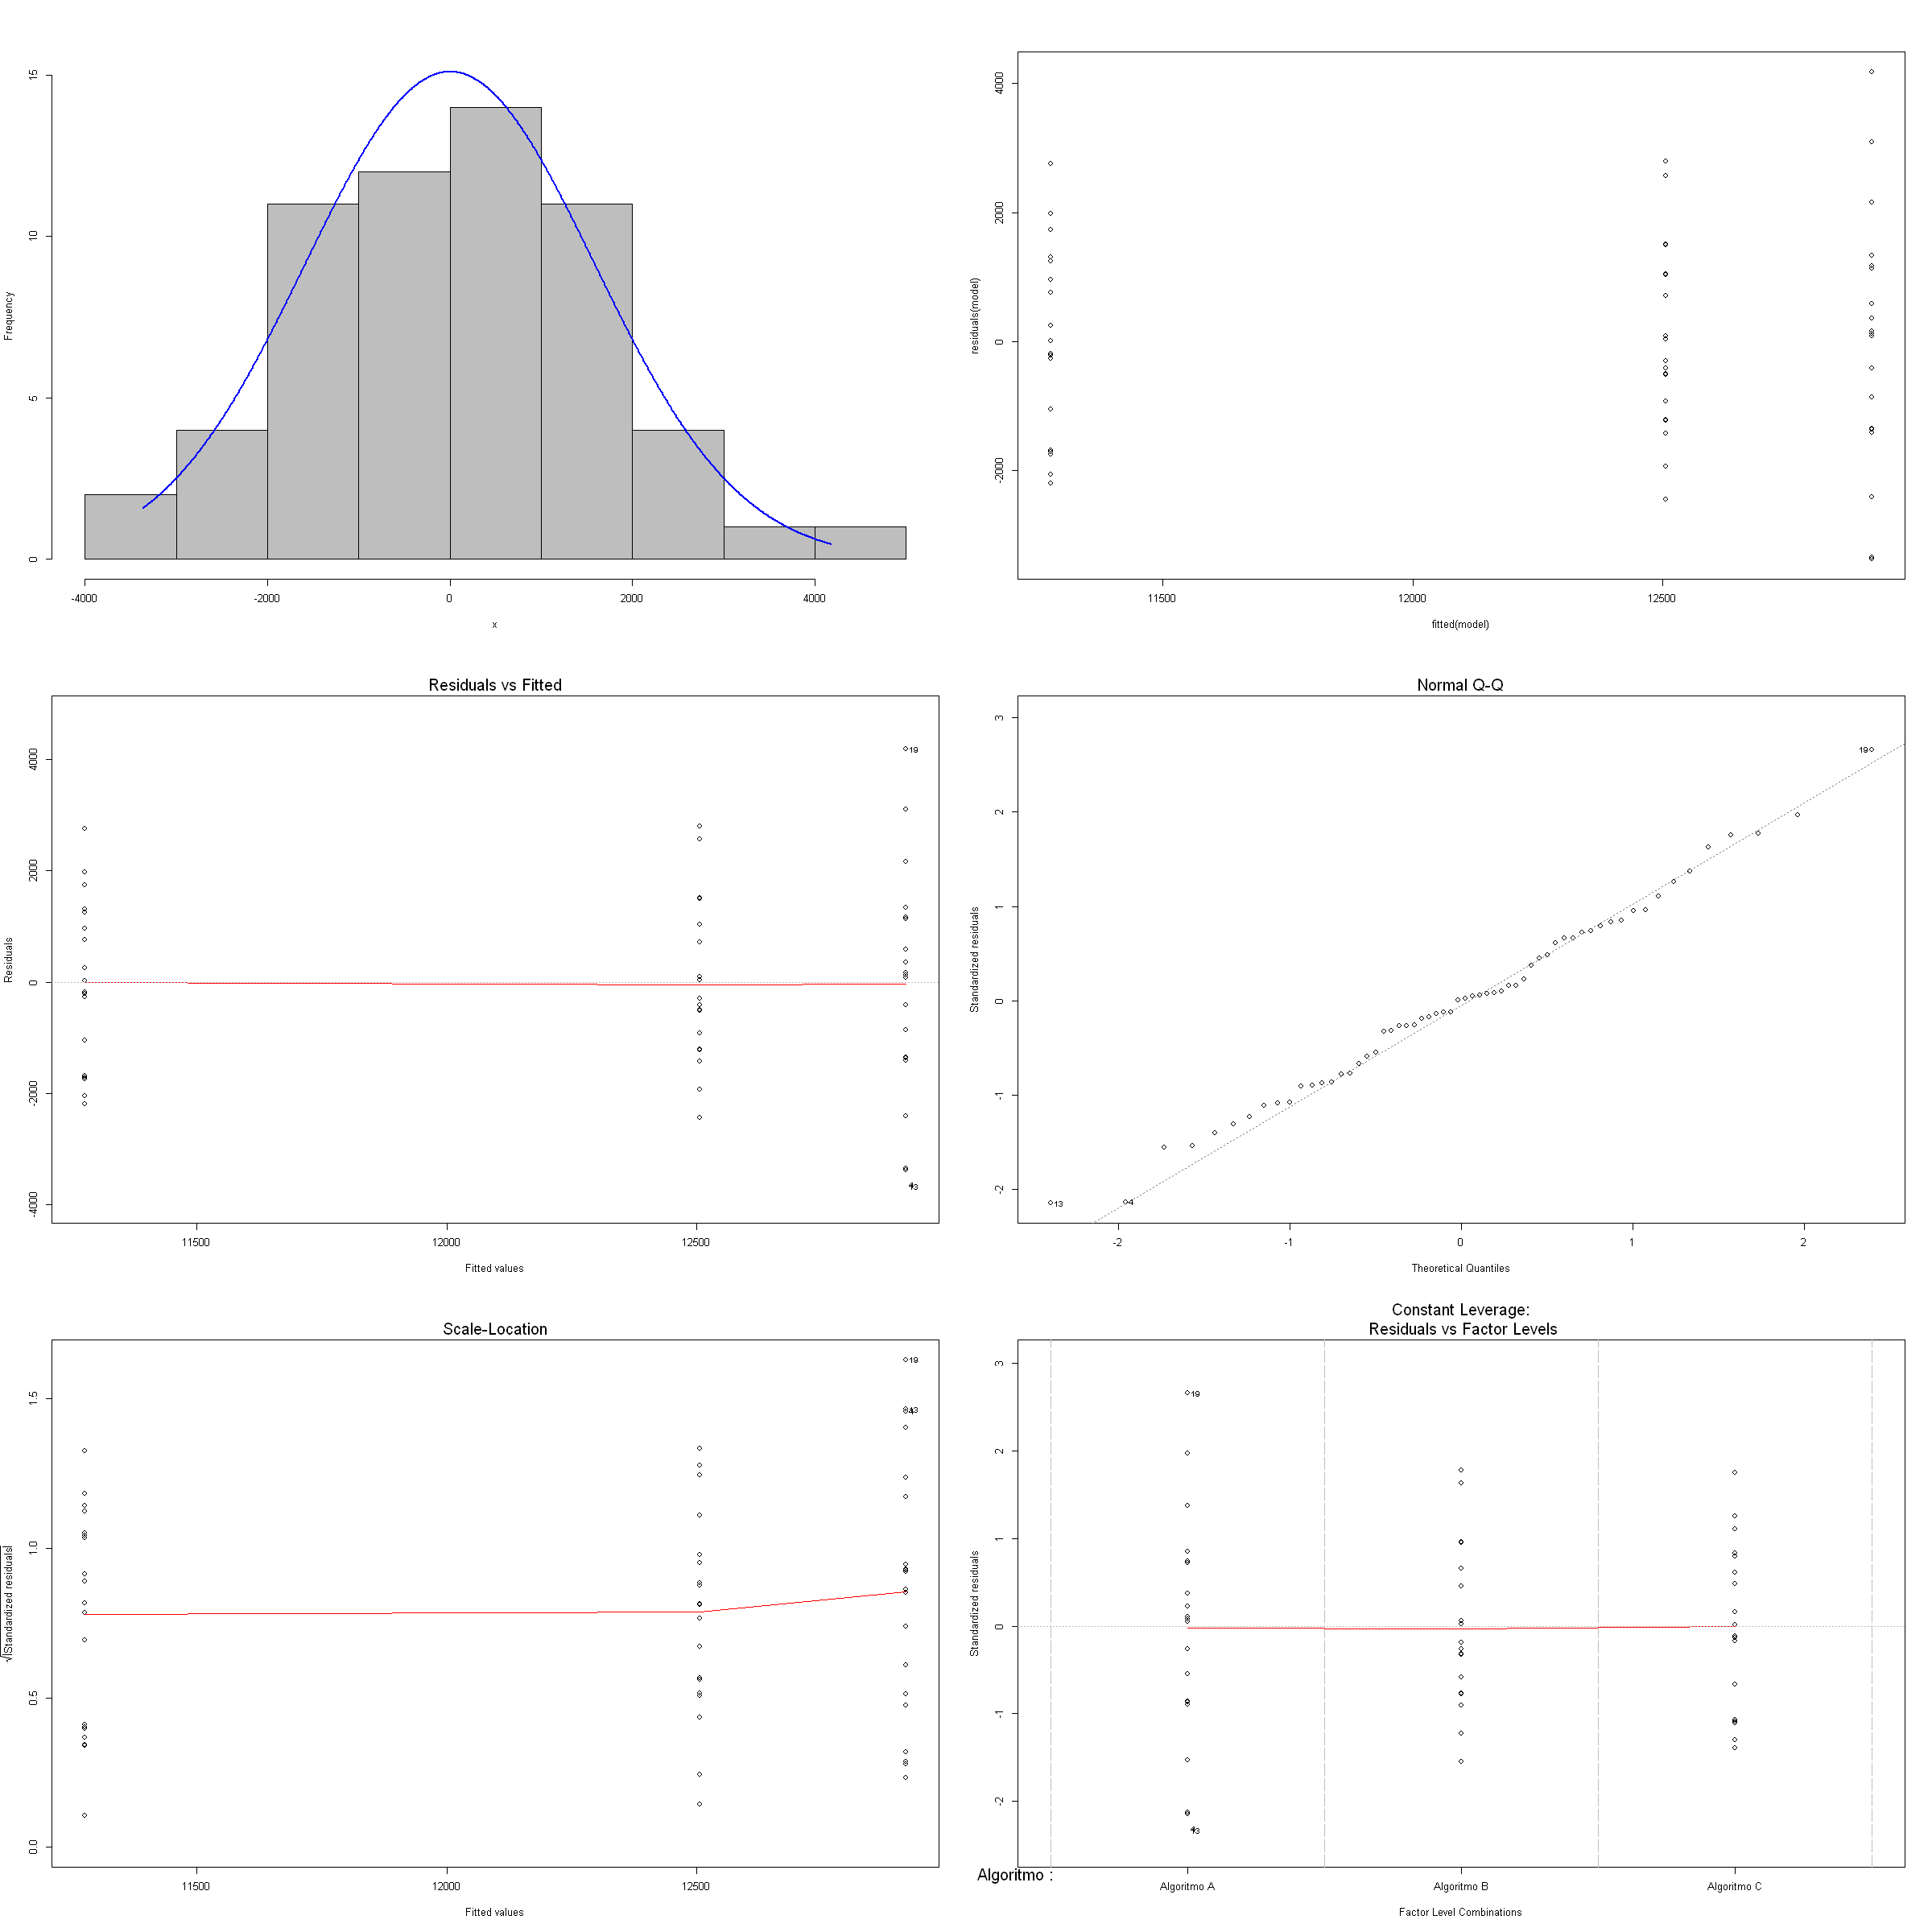

In [52]:
options(repr.plot.width=20, repr.plot.height=20)
par(mfrow=c(3,2))
x=residuals(model)
library(rcompanion)
plotNormalHistogram(x)
plot(fitted(model), residuals(model))
plot(model)


## Pruebas de separación de promedios

In [23]:
library(multcompView)
library(lsmeans)
marginal = lsmeans(model, ~ Algoritmo)
pairs(marginal, adjust="tukey")

 contrast                  estimate  SE df t.ratio p.value
 Algoritmo A - Algoritmo B      413 510 57   0.810  0.6981
 Algoritmo A - Algoritmo C     1643 510 57   3.222  0.0059
 Algoritmo B - Algoritmo C     1229 510 57   2.411  0.0494

P value adjustment: tukey method for comparing a family of 3 estimates 

In [47]:
library(multcomp)

CLD = cld(marginal, 
          alpha = 0.05, 
          Letters=letters,
          adjust = "tukey")
CLD

Note: adjust = "tukey" was changed to "sidak"
because "tukey" is only appropriate for one set of pairwise comparisons



,Algoritmo,lsmean,SE,df,lower.CL,upper.CL,.group
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3,Algoritmo C,11276.15,360.5083,57,10389.33,12162.97,a
2,Algoritmo B,12505.60,360.5083,57,11618.78,13392.42,b
1,Algoritmo A,12918.80,360.5083,57,12031.98,13805.62,b


## Graficando los promedios 

In [53]:
## Primero se ordenan los promedios
CLD$Algoritmo = factor(CLD$Algoritmo,
                      levels=c("Algoritmo A",
                              "Algoritmo B",
                              "Algoritmo C"))

##Luego se remueven los espacios en blanco en CLD
CLD$.group=gsub(" ", "",CLD$.group)

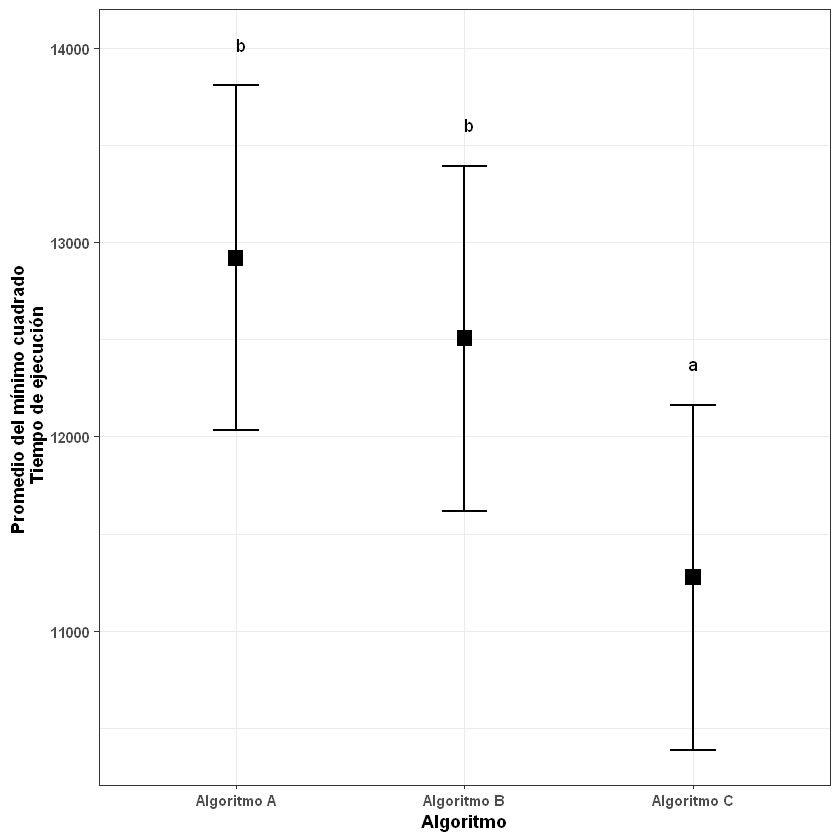

In [48]:
library(ggplot2)
ggplot(CLD, aes(x = Algoritmo, y=lsmean, label = .group))+
geom_point(shape=15,size=4)+
geom_errorbar(aes(ymin= lower.CL, ymax=upper.CL),width=0.2,size=0.7)+
theme_bw()+
theme(axis.title = element_text(face = "bold"),
     axis.text = element_text(face = "bold"),
     plot.caption = element_text(hjust =0))+
ylab("Promedio del mínimo cuadrado \n Tiempo de ejecución")+
geom_text(nudge_x = c(0, 0, 0),
         nudge_y = c(1100, 1100, 1100),
         color = "black")